In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()
%matplotlib inline

from tqdm import tqdm, tqdm_notebook

In [4]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

transact_cols = [f for f in train.columns if f not in ["ID", "target"]]
y = np.log1p(train["target"]).values


In [57]:
tmp = pd.DataFrame()



In [20]:
train = train.replace({0:np.nan}).drop(["ID","target"],axis=1)
test = test.replace({0:np.nan}).drop(["ID"],axis=1)

In [58]:
tmp["count_not0"] = train.count()
tmp["sum"] = train.sum()
tmp["mean"] = train.mean()

In [59]:
tmp.reset_index(inplace=True)

In [60]:
cols = ['f190486d6', '58e2e02e6', 'eeb9cd3aa', '9fd594eec', '6eef030c1', '15ace8c9f', 
        'fb0f5dbfe', '58e056e12', '20aa07010', '024c577b9', 'd6bb78916', 'b43a7cfd5', 
        '58232a6fb', '1702b5bf0', '324921c7b', '62e59a501', '2ec5b290f', '241f0f867', 
        'fb49e4212', '66ace2992', 'f74e8f13d', '5c6487af1', '963a49cdc', '26fc93eb7', 
        '1931ccfdd', '703885424', '70feb1494', '491b9ee45', '23310aa6f', 'e176a204a', 
        '6619d81fc', '1db387535', 
        'fc99f9426', '91f701ba2', '0572565c2', '190db8488', 'adb64ff71', 'c47340d97', 'c5a231d81', '0ff32eb98'
       ]


In [61]:
tmp2 = pd.DataFrame({"index":cols,"leak_cols":"L"})

In [62]:
tmp = pd.merge(tmp,tmp2,how="left",on="index").fillna("N")

In [65]:
tmp.set_index("index",inplace=True)

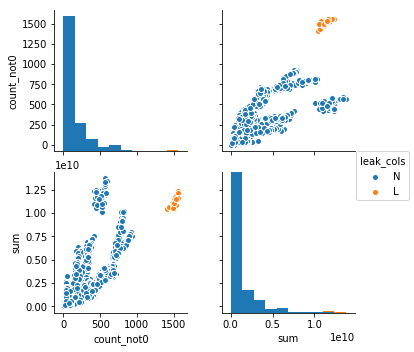

In [66]:
sns.pairplot(tmp, hue='leak_cols').savefig('cols.png')

In [7]:
X_train = train.drop(["ID", "target"], axis=1)

y_train = np.log1p(train["target"].values)

X_test = test.drop(["ID"], axis=1)

ntrain = len(X_train)
ntest = len(X_test)

del(train)
del(test)


C:\Users\br141\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


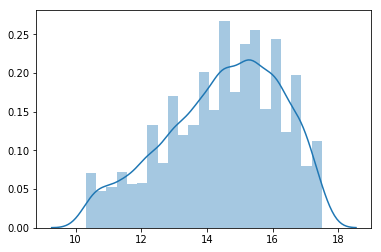

In [8]:
sns.distplot(y_train)

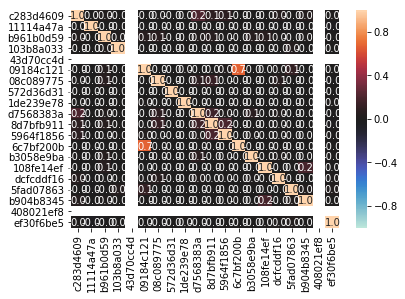

In [9]:
corr_mat = X_train[X_train.columns[-80:-60]].corr(method='pearson')

sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

In [15]:
agg_col= pd.read_csv("./data/col_aggregate.csv")
del(agg_col["Unnamed: 0"])

In [16]:
X_train = agg_col.drop(["feature","importance"],axis=1)
y_train = agg_col["importance"].values

from sklearn import model_selection
from sklearn import ensemble

#寄与率が少ない　=> 出現頻度が少ないってだけなのでそこをうまくカバー
#importanceが少ないものはまとめる（まとめ方を工夫）

NUM_OF_FEATURES = 1000


x1, x2, y1, y2 = model_selection.train_test_split(
    X_train, y_train, test_size=0.20, random_state=5)
model = ensemble.RandomForestRegressor(n_jobs=-1, random_state=7)
model.fit(x1, y1)

col = pd.DataFrame({'importance': model.feature_importances_, 'feature': X_train.columns}).sort_values(
    by=['importance'], ascending=[False])

In [17]:
df = agg_col.drop(["feature"],axis=1)

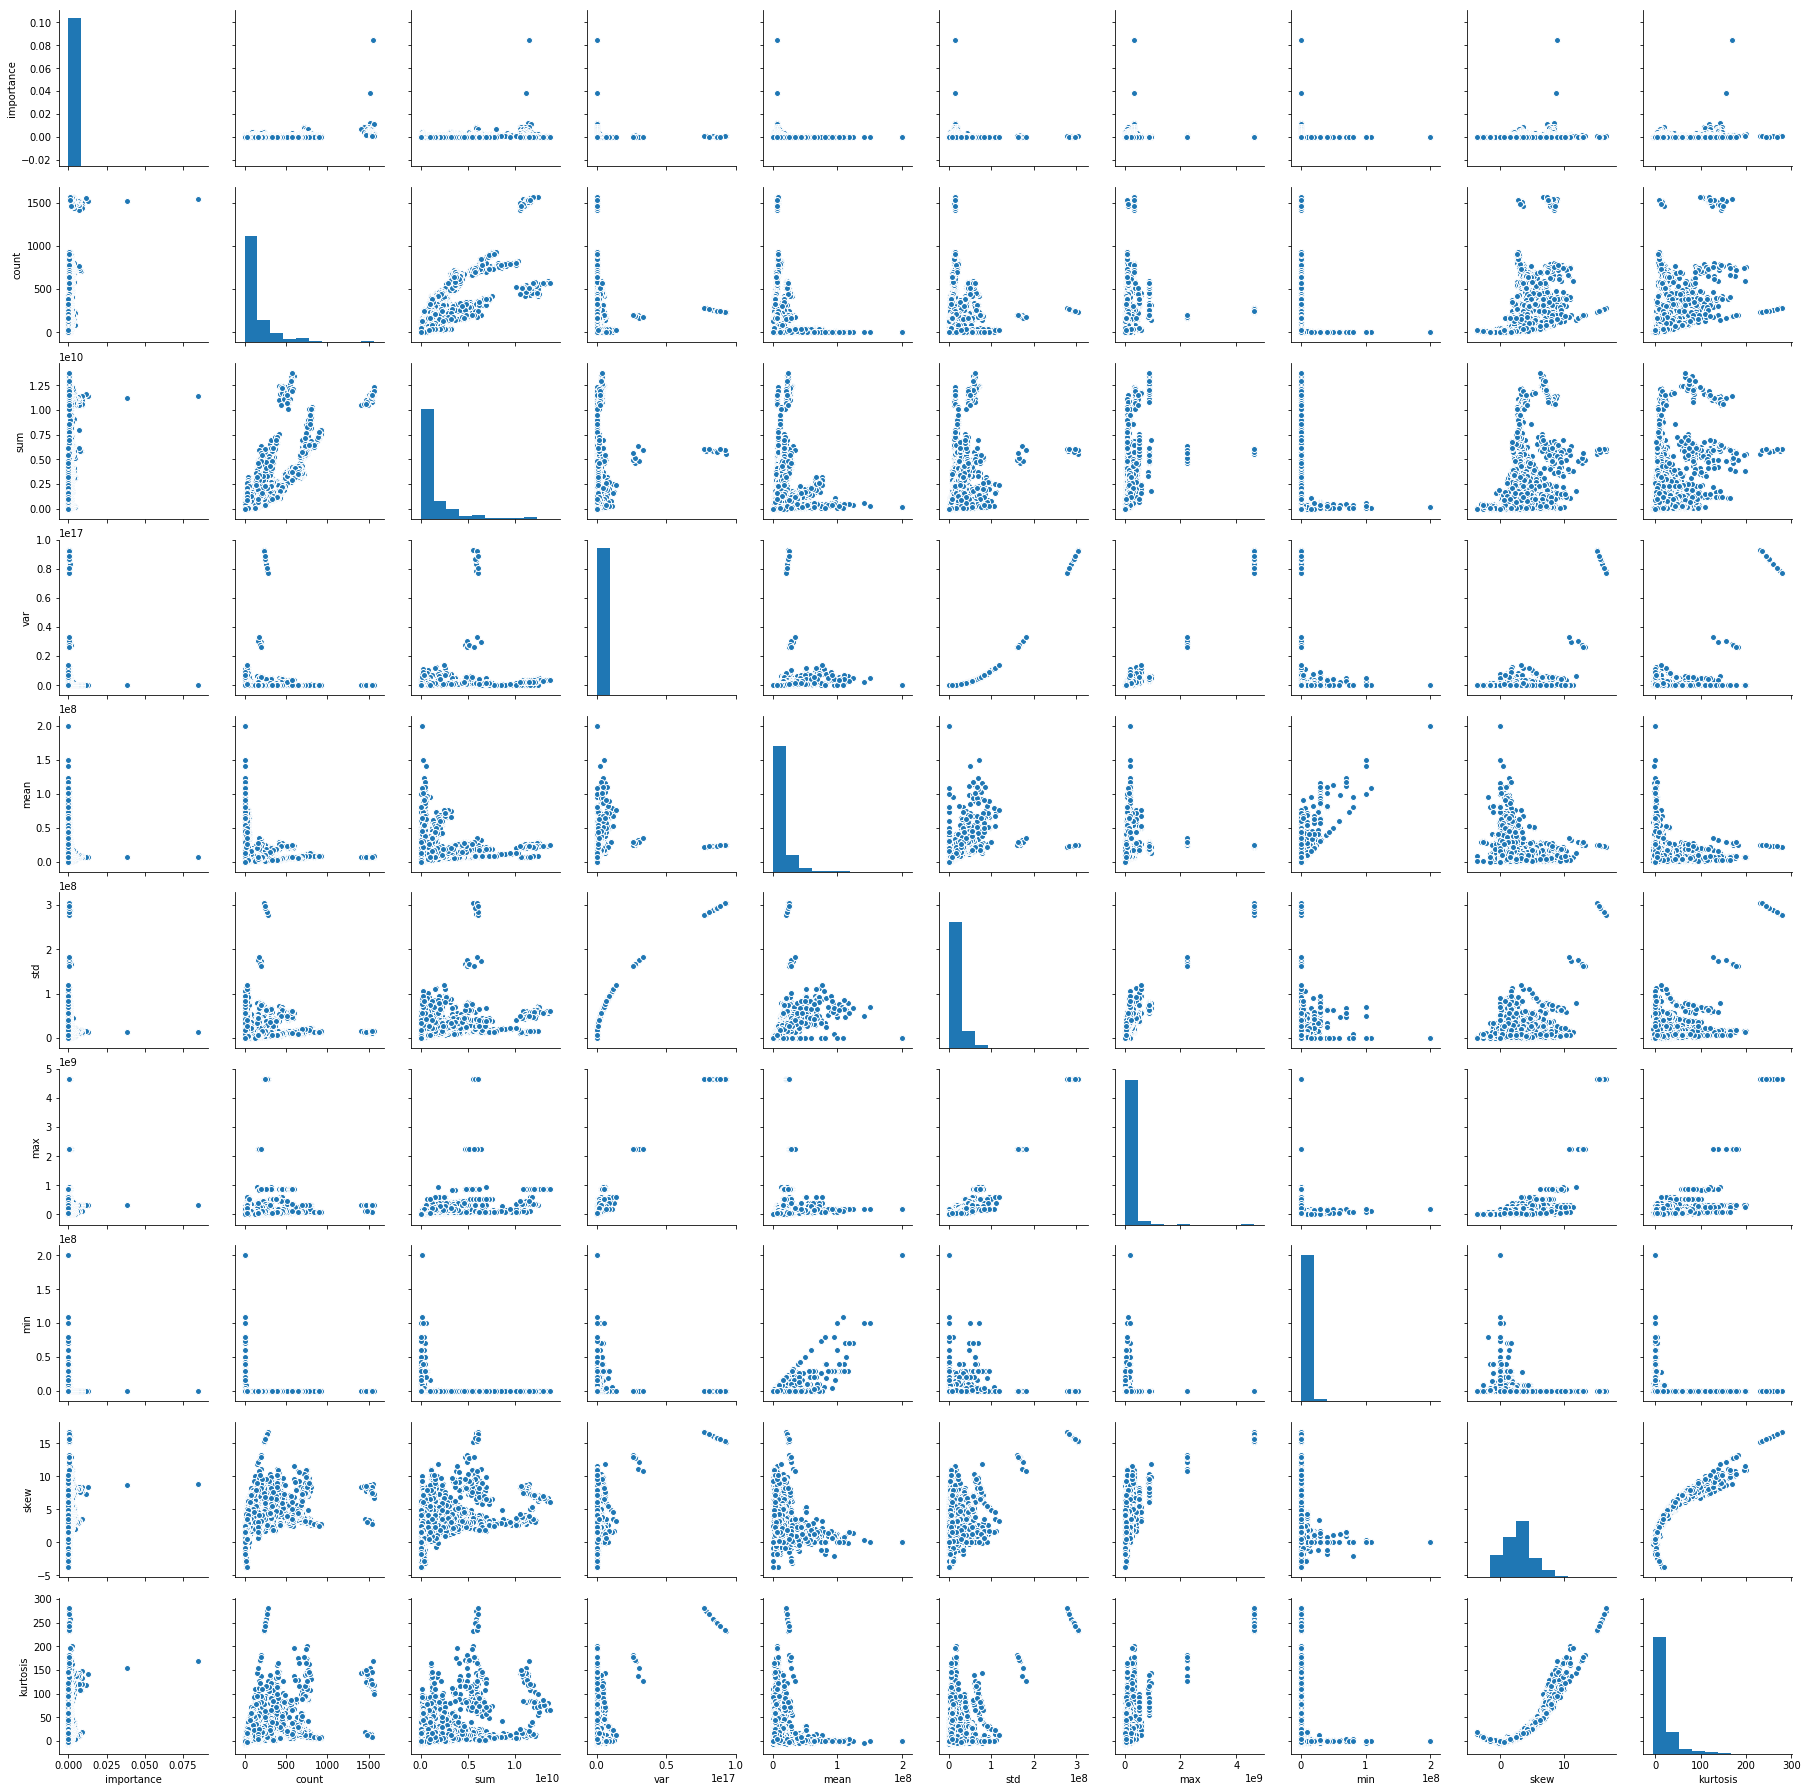

In [18]:
sns.pairplot(df)